<b> No-Atmosphere Climate Model </b><br>
Source: Walter A. Robinson, Modeling Dynamic Climate Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

In [2]:
# 0.1 year (Julian) = 3155760 seconds
delta = 0.1 * 24 * 3600 * 365.25

# Set up a 10 years simulation
tmin = 0
tmax = 10 * 24 * 3600 * 365.25
t = np.arange(tmin, tmax + delta, delta)

n = len(t)

In [3]:
# Albedo
albedo = 0.3

# Initial temperature
temp_k = 273 # K

# Stefan-Boltzmann constant W/m^2*K^4
sigma = 5.6696e-8

# Solar constant W/m^2
solar_cost = 1367

# Density of water
water_density = 1000 # kg/m^3

# Depth of the mixed layer
depth_mixed_layer = 50 # m

# Specific heat capacity of water
spec_heat_water = 4218 # J/kg*K

In [4]:
# Heat capacity
heat_capacity = water_density * depth_mixed_layer * spec_heat_water

In [5]:
# Absorbed solar energy
solar = solar_cost/4 * (1 - albedo)

In [6]:
# Array to store the result
temperatures = np.zeros((n,))

# Set initial temperature
temperatures[0] = temp_k
for k in range(1, n):

    # Outgoing IR
    ir = sigma * temperatures[k-1]**4

    # Temperature = Energy/Heat capacity
    temperatures[k] = temperatures[k-1] + ((solar - ir) * delta)/heat_capacity

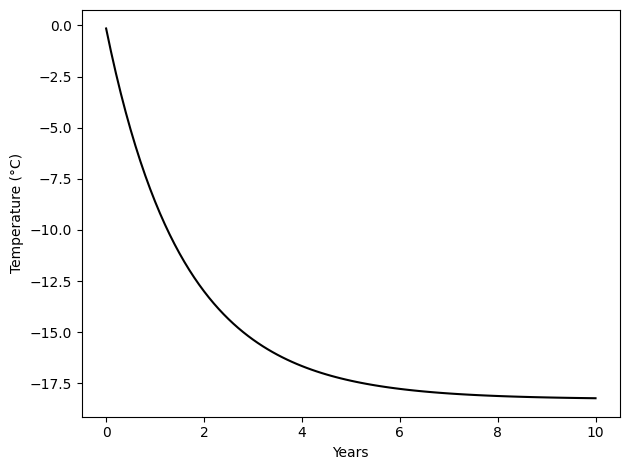

In [7]:
# Get Years
years = t/(24 * 3600 * 365.25)

# Convert to °C
temperatures = temperatures - 273.15

# Creates a figure and one subplot
fig, ax = plt.subplots()
ax.set_xlabel("Years")
ax.set_ylabel("Temperature (°C)")

# Plot the data
ax.plot(years, temperatures, c='k')
plt.tight_layout()
plt.show()